# Pokemon Type Advantage Graphs

This is a Maple iPython notebook demonstrating the Jupyter kernel included with Maple 2022.
For instructions on how to set up a Maple to run with Jupyter on your own machine type the command ?Jupyter/MapleKernel in Maple

First load the entire graph theory package, we will use many of its commands

In [1]:
with(GraphTheory):

This list was retreived from https://pokeapi.co/api/v2/type/

In [2]:
typelist := ["normal", "fighting", "bug", "flying", "grass", "rock", "ground",
             "poison", "dark", "ghost", "psychic", "fire", "ice", "steel", "water",
             "electric", "dragon", "fairy"];

["normal", "fighting", "bug", "flying", "grass", "rock", "ground", "poison", "dark", "ghost", "psychic", "fire", "ice", "steel", "water", "electric", "dragon", "fairy"]

These edges determined by looking up the JSON data at https://pokeapi.co/api/v2/type/TYPENAME/ and querying the "damage_relations" for "double_damage_to" types.

In [3]:
edges :=
{["bug", "dark"], ["bug", "grass"], ["bug", "psychic"], ["dark", "ghost"],
 ["dark", "psychic"], ["fairy", "dark"], ["fairy", "dragon"], ["fairy", "fighting"],
 ["fire", "bug"], ["fire", "grass"], ["fire", "ice"], ["fire", "steel"],
 ["flying", "bug"], ["flying", "grass"], ["flying", "fighting"], ["ghost", "psychic"],
 ["grass", "ground"], ["grass", "rock"], ["grass", "water"], ["ground", "fire"],
 ["ground", "poison"], ["ground", "rock"], ["ground", "steel"], ["ground", "electric"],
 ["ice", "dragon"], ["ice", "flying"], ["ice", "grass"], ["ice", "ground"],
 ["poison", "fairy"], ["poison", "grass"], ["psychic", "poison"], ["psychic", "fighting"],
 ["rock", "bug"], ["rock", "fire"], ["rock", "flying"], ["rock", "ice"], ["steel", "fairy"],
 ["steel", "ice"], ["steel", "rock"], ["water", "fire"], ["water", "ground"],
 ["water", "rock"], ["electric", "flying"], ["electric", "water"], ["fighting", "dark"],
 ["fighting", "ice"], ["fighting", "normal"], ["fighting", "rock"], ["fighting", "steel"]}

{["bug", "dark"], ["bug", "grass"], ["bug", "psychic"], ["dark", "ghost"], ["dark", "psychic"], ["fairy", "dark"], ["fairy", "dragon"], ["fairy", "fighting"], ["fire", "bug"], ["fire", "grass"], ["fire", "ice"], ["fire", "steel"], ["flying", "bug"], ["flying", "grass"], ["flying", "fighting"], ["ghost", "psychic"], ["grass", "ground"], ["grass", "rock"], ["grass", "water"], ["ground", "fire"], ["ground", "poison"], ["ground", "rock"], ["ground", "steel"], ["ground", "electric"], ["ice", "dragon"], ["ice", "flying"], ["ice", "grass"], ["ice", "ground"], ["poison", "fairy"], ["poison", "grass"], ["psychic", "poison"], ["psychic", "fighting"], ["rock", "bug"], ["rock", "fire"], ["rock", "flying"], ["rock", "ice"], ["steel", "fairy"], ["steel", "ice"], ["steel", "rock"], ["water", "fire"], ["water", "ground"], ["water", "rock"], ["electric", "flying"], ["electric", "water"], ["fighting", "dark"], ["fighting", "ice"], ["fighting", "normal"], ["fighting", "rock"], ["fighting", "steel"]}

Build a graph object

In [4]:
G := Graph(typelist, edges);

GRAPHLN(directed,unweighted,["normal", "fighting", "bug", "flying", "grass", "rock", "ground", "poison", "dark", "ghost", "psychic", "fire", "ice", "steel", "water", "electric", "dragon", "fairy"],Array(1..18, [{},{1, 6, 9, 13, 14},{5, 9, 11},{2, 3, 5},{6, 7, 15},{3, 4, 12, 13},{6, 8, 12, 14, 16},{5, 18},{10, 11},{11},{2, 8},{3, 5, 13, 14},{4, 5, 7, 17},{6, 13, 18},{6, 7, 12},{4, 15},{},{2, 9, 17}]),`GRAPHLN/table/1`,0)

Create a color palette object of colors corresponding with each type

In [5]:
P := ColorTools:-Palette([
    "normal" = "#A8A77A", "fire" = "#EE8130", "water" = "#6390F0",
    "electric" = "#F7D02C", "grass" = "#7AC74C", "ice" = "#96D9D6",
    "fighting" = "#C22E28", "poison" = "#A33EA1", "ground" = "#E2BF65",
    "flying" = "#A98FF3", "psychic" = "#F95587", "bug" = "#A6B91A",
    "rock" = "#B6A136", "ghost" = "#735797", "dragon" = "#6F35FC",
    "dark" = "#705746", "steel" = "#B7B7CE", "fairy" = "#D685AD"
    ])

$$\mathit{<\,Palette:\,[``normal",\,"fire",\,"water",\,"electric",\,"grass",\,"ice",\,"fighting",\,"poison",\,"ground",\,"flying",\,"psychic",\,"bug",\,"rock",\,"ghost",\,"dragon",\,"dark",\,"steel",\,"fairy"]\,>\,}$$

Set the default style of the graph elements using those colors

In [6]:
for t in typelist do
    StyleVertex(G, t, color = P[t]);
end do;
for e in edges do
    StyleEdge(G, e, color = P[e[1]]);
end do;

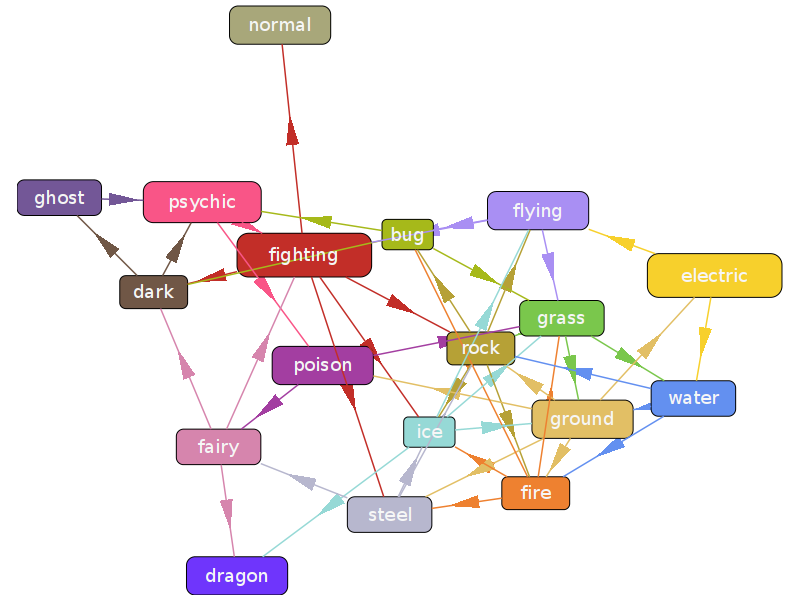

In [7]:
DrawGraph(G, layout=spring, 
    stylesheet = [  vertexshape = "rounded rectangle",
                    vertexpadding = 0, vertexfontcolor = "#f7f7f7",
                    edgethickness = 1] )

Now we're looking for an isomorphic copy of the Rock-Paper-Scissors-Lizard-Spock graph instead the type advantage graph G. If there is one, it's underlying graph is K5. The FindClique command will find only one 5 vertex complete graph inside G. We look for cliques in various subgraphs of G to force FindClique to find more.

In [8]:
rpsls := {}:
for i from 1 to nops(typelist) do
    # find a copy of K5 with the ith type removed
    out := FindClique(UnderlyingGraph(InducedSubgraph(G, subsop(i = NULL, typelist))), 5);
    if out = NULL then
        next;
    end if;
    
    # now make sure there aren't more copies of K5 in this subgraph by additionally
    # removing one vertex of 'out' at a time and looking for another Clique 
    rpsls2 := rpsls union {out};
    for j to nops(out) do
        out2 := FindClique(UnderlyingGraph(InducedSubgraph(G,
            subs(out[j] = NULL, subsop(i=NULL, typelist)))), 5);
        if out2 = NULL then
            next;
        end if;
        # if we find a Clique with two vertices removed, try again with
        # three vertices removed (this is enough for G)
        rpsls2 := rpsls2 union {out2};
        out3 := {seq(FindClique(UnderlyingGraph(InducedSubgraph(G,
            subs(out2[k]= NULL, out[j] = NULL, subsop(i=NULL, typelist)))), 5),
            k = 1 .. nops(out2))};
        rpsls2 := rpsls2 union out3;
    end do;

    # in the end all the work in the above subloop is not necessary to find
    # all the Cliques, but it is nessary to demonstrate that there are only the three

    if rpsls <> rpsls2 then
       rpsls := rpsls2;
    end if;
    
end do:

rpsls;

{["grass", "rock", "ground", "fire", "ice"], ["grass", "rock", "ground", "fire", "water"], ["rock", "ground", "fire", "ice", "steel"]}

In [9]:
H := map2( InducedSubgraph, G, rpsls )

{GRAPHLN(directed,unweighted,["grass", "rock", "ground", "fire", "ice"],Array(1..5, [{2, 3},{4, 5},{2, 4},{1, 5},{1, 3}]),`GRAPHLN/table/470`,0), GRAPHLN(directed,unweighted,["grass", "rock", "ground", "fire", "water"],Array(1..5, [{2, 3, 5},{4},{2, 4},{1},{2, 3, 4}]),`GRAPHLN/table/471`,0), GRAPHLN(directed,unweighted,["rock", "ground", "fire", "ice", "steel"],Array(1..5, [{3, 4},{1, 3, 5},{4, 5},{2},{1, 4}]),`GRAPHLN/table/472`,0)}

The first 5 vertex clique is isomorphic to the Rock-Paper-Scissors-Lizard-Spock graph, every vertex has indegree=outdegree=2

In [10]:
map2((G,v)->v::[InDegree(G,v), OutDegree(G,v)], H[1], rpsls[1])

["grass"::[2, 2], "rock"::[2, 2], "ground"::[2, 2], "fire"::[2, 2], "ice"::[2, 2]]

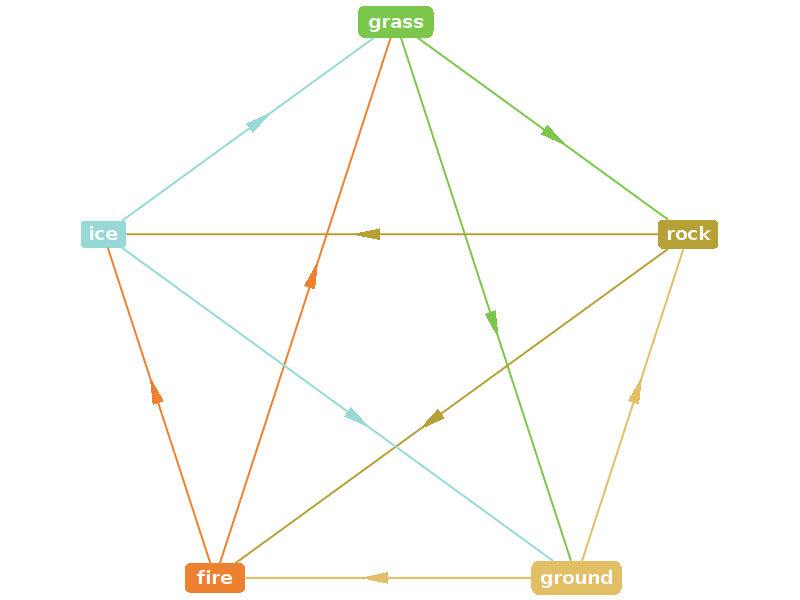

In [11]:
DrawGraph( H[1], layout = circle,
    stylesheet = [  vertexshape = "rounded rectangle", vertexpadding = 0,
                    edgethickness = 2, vertexborder = "White", vertexfontstyle = "bold",
                    vertexfontcolor = "White"]
    )

The second 5 vertex clique is not isomorphic to RPSLS, because the degrees don't match

In [12]:
map2((G,v)->v::[InDegree(G,v), OutDegree(G,v)], H[2], rpsls[2])

["grass"::[1, 3], "rock"::[3, 1], "ground"::[2, 2], "fire"::[3, 1], "water"::[1, 3]]

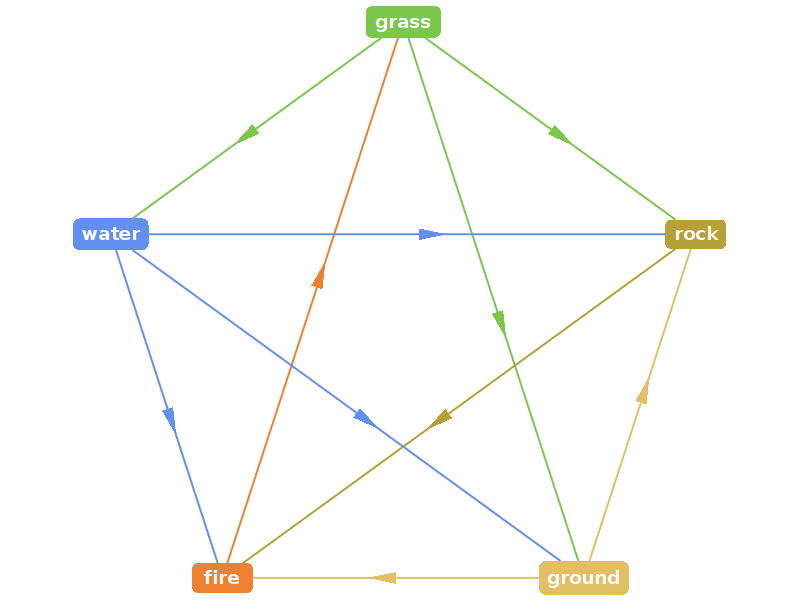

In [13]:
DrawGraph( H[2], layout = circle,
    stylesheet = [  vertexshape = "rounded rectangle", vertexpadding = 0,
                    edgethickness = 2, vertexborder = "White", vertexfontstyle = "bold",
                    vertexfontcolor = "White"]
    )

The third 5 vertex clique is not isomorphic to RPSLS, but is isomorphic to the graph of the game RPS+Fire+Water where fire (here: "ground") beats everything except water (here: "ice"), and water loses to everything but fire

In [14]:
map2((G,v)->v::[InDegree(G,v), OutDegree(G,v)], H[3], rpsls[3])

["rock"::[2, 2], "ground"::[1, 3], "fire"::[2, 2], "ice"::[3, 1], "steel"::[2, 2]]

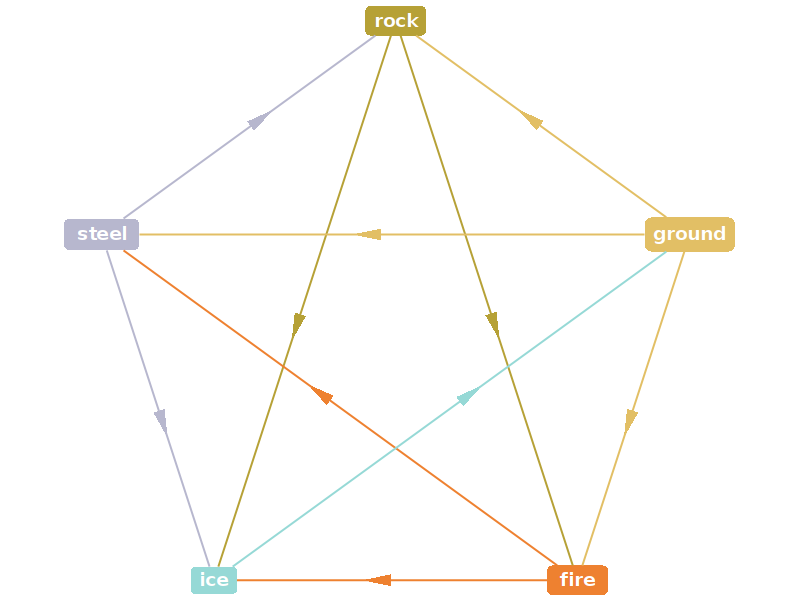

In [15]:
DrawGraph( H[3], layout = circle,
    stylesheet = [  vertexshape = "rounded rectangle", vertexpadding = 0,
                    edgethickness = 2, vertexborder = "White", vertexfontstyle = "bold",
                    vertexfontcolor = "White"]
    )